In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [2]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [16]:
manip = ExperimentClass.Experiment("20241201_DTT_Pt1-27","PSI", DataType=".csv", sep = ';')



In [17]:
def compute_params(Experiment_df):
    
    t_F0 = [0, 9]                  # time interval for F0 calculation in seconds
    t_Fstat = [-6, -0.5]              # time interval for Fstat calculation in seconds RELATIVE TO F_MAX!!!
    t_Fmax = [0.1, 0.12]       # time interval for Fmax_OJ calculation in seconds RELATIVE TO F_MAX!!!
    
    F_max = []
    F_stat = []
    NPQ = []
    phi_stat = []
    times_Fmax = []

    for i, k in enumerate(Experiment_df.records):
        aux_F_max = []
        aux_F_stat = []
        aux_NPQ = []
        aux_phi_stat = []
        total_time = Experiment_df.Time.values[-1]
        times_Fmax.append(np.array([9.1] + list(np.arange(70, total_time, 60))))        
        for j, t in enumerate(times_Fmax[-1]):
            aux_F_max.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fmax[0] + t)[0][0] :np.where(Experiment_df.Time>= t_Fmax[1] + t)[0][0]]))
            aux_F_stat.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fstat[0] + t)[0][0] :np.where(Experiment_df.Time>= t_Fstat[1] + t)[0][0]]))
            aux_NPQ.append((aux_F_max[0] - aux_F_max[j])/aux_F_max[j])
            aux_phi_stat.append((aux_F_max[j] - aux_F_stat[j])/aux_F_max[j])

        F_max.append(np.array(aux_F_max)/aux_F_max[0])
        F_stat.append(np.array(aux_F_stat)/aux_F_max[0])
        NPQ.append(np.array(aux_NPQ))
        phi_stat.append(np.array(aux_phi_stat))

    
    return times_Fmax, F_max, F_stat, NPQ, phi_stat
    

In [18]:
times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(manip)
i = manip.records.index('DTT')
df = pd.DataFrame({"Time": times_Fmax[i], "F_max": F_max[i], "F_stat": F_stat[i], "NPQ": NPQ[i], "Phi_stat": phi_stat[i]})
df.to_csv(f"{manip.path}/params.csv", sep = ";", index = False)


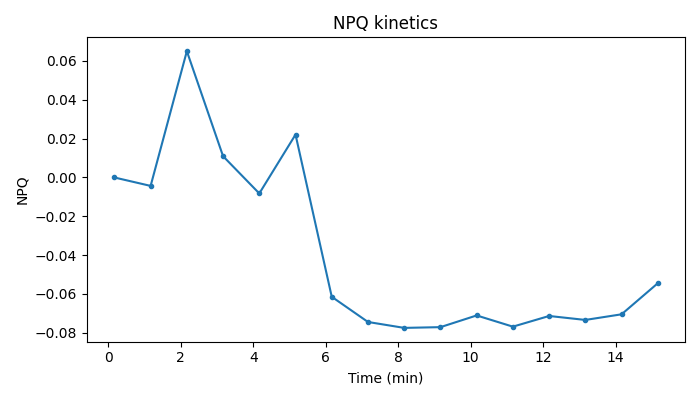

In [19]:
fig, ax = plt.subplots(figsize = (7,4))
for i, k in enumerate(manip.records):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-', markersize = 3)

ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title(f"NPQ kinetics")
fig.tight_layout()


fig.savefig(manip.fig_folder + f"/NPQ.png")